# Analyzing the problem

**Task** - predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

# Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import math
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline

# Data summary

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
data = pd.read_csv('train.csv')

In [3]:
pd.read_csv('train.csv')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
data2 = pd.read_csv('train.csv')

In [5]:
data2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [9]:
# Categorical features:

In [10]:
data["PassengerId"].head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [11]:
data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [12]:
data["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [13]:
data["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [14]:
data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [15]:
data["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [16]:
data["Name"].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [17]:
# Visualization

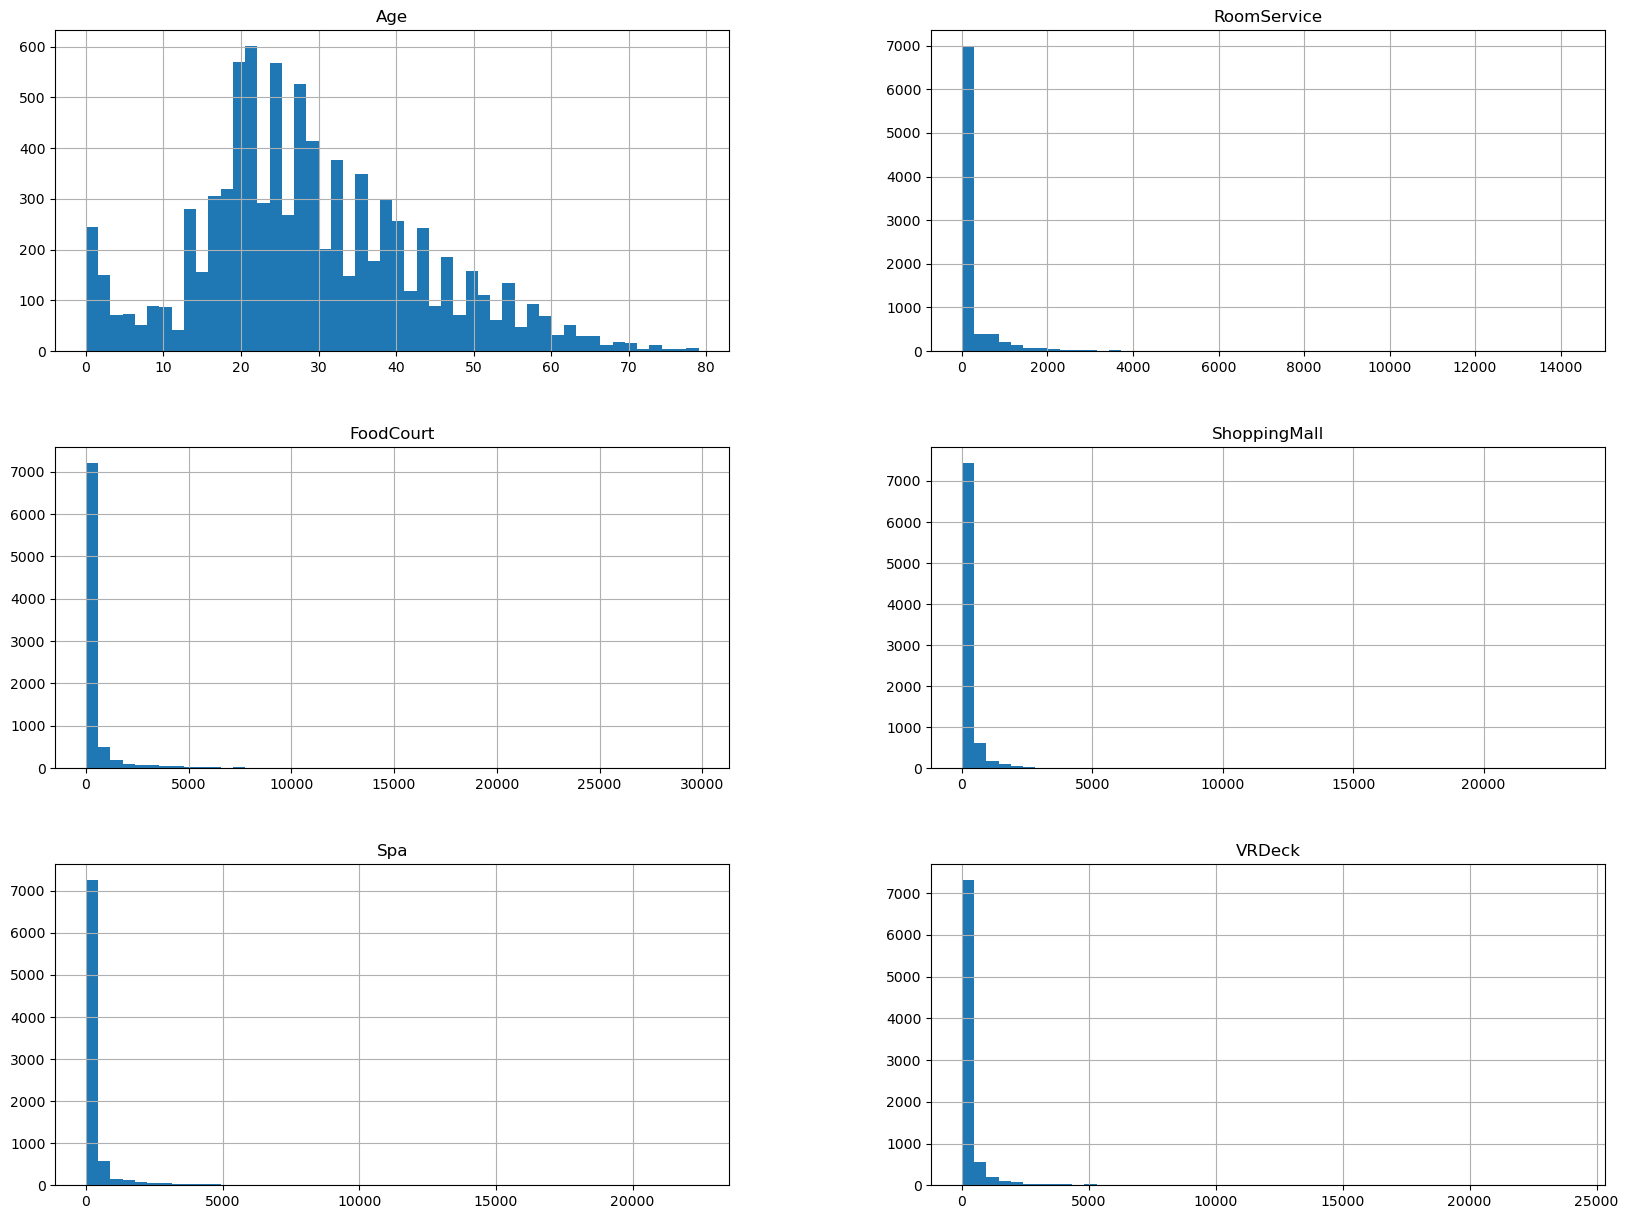

In [18]:
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

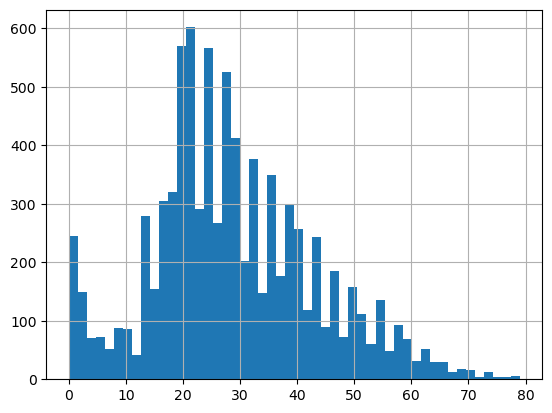

In [19]:
data["Age"].hist(bins=50)

In [20]:
# Checking nulls

In [21]:
data.isnull().sum().sort_values()

PassengerId       0
Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

# Data Transformation

In [22]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [23]:
data = data.fillna({"RoomService":0, "FoodCourt":0, "ShoppingMall":0, "Spa":0, "VRDeck":0})

In [24]:
data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
# all of the columns that indicates whether the passenger used luxury services on spaceship

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [25]:
data["LuxuryAmenities"] = data["RoomService"] + data["FoodCourt"] + data["ShoppingMall"] + data["Spa"] + data["VRDeck"]

In [26]:
data = data.drop(columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"])

In [27]:
#values = {"LuxuryAmenities": 0}
#data = data.fillna(value=values)

<AxesSubplot:>

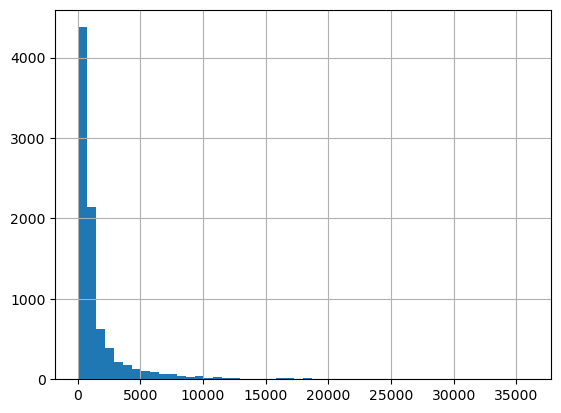

In [28]:
data["LuxuryAmenities"].hist(bins=50)

In [29]:
bins = [-np.inf, 0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, np.inf]

In [30]:
bins_labels = list(range(1, len(bins)))

In [31]:
data ["LuxuryAmenities_cat"] = pd.cut(data["LuxuryAmenities"],
       bins=bins,
       labels=bins_labels)

In [32]:
#data["LuxuryAmenities_cat"].value_counts()

In [33]:
#data[data["LuxuryAmenities_cat"].isna()]

In [34]:
data = data.drop(columns=["LuxuryAmenities"])

In [35]:
# Age

In [36]:
data["Age"] = data['Age'].fillna(np.ceil(data["Age"].mean()))

In [37]:
# Adding a age category instead of specific age numbers

<AxesSubplot:>

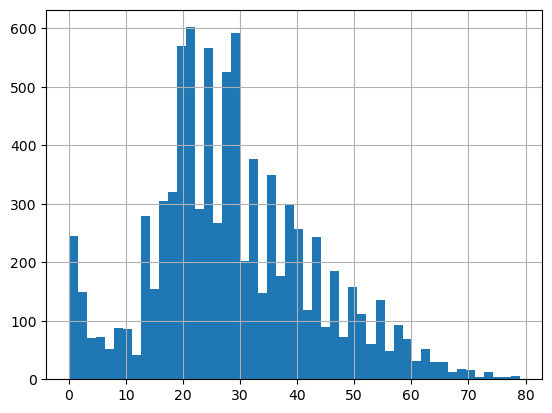

In [38]:
data["Age"].hist(bins=50)

In [39]:
data["Age_cat"] = pd.cut(data["Age"],
       bins=[-np.inf, 0, 17, 29, 39, 49, 59, np.inf],
       labels=[1, 2, 3, 4, 5, 6, 7])

In [40]:
data = data.drop(columns="Age")

In [41]:
# VIP

In [42]:
data["VIP"] = data['VIP'].fillna(False)

In [43]:
data["VIP"] = data["VIP"].astype(int)

In [44]:
# CryoSleep

In [45]:
data["CryoSleep"] = data["CryoSleep"].fillna(False)
data["CryoSleep"] = data["CryoSleep"].astype(int)

In [46]:
# Cabin -> deck/num/side

In [47]:
str_df = data['Cabin'].str.split(expand=True).reindex(columns=np.arange(3)).add_prefix('cabin')

In [48]:
data[['CabinDeck', 'CabinNum', 'CabinSide']] = data['Cabin'].str.split('/', -1, expand=True)

In [49]:
data["CabinDeck"] = data["CabinDeck"].fillna(data["CabinDeck"].mode().iloc[0])
data["CabinSide"] = data["CabinSide"].fillna(data["CabinSide"].mode().iloc[0])

In [50]:
data = data.drop(columns=["Cabin","CabinNum"])

In [51]:
# Destination

In [52]:
data["Destination"] = data["Destination"].fillna(data["Destination"].mode().iloc[0])

In [53]:
# HomePlanet

In [54]:
data["HomePlanet"] = data["HomePlanet"].fillna(data["HomePlanet"].mode().iloc[0])

In [55]:
# Name

In [56]:
data = data.drop(columns="Name")

In [57]:
data.isnull().sum().sort_values()

PassengerId            0
HomePlanet             0
CryoSleep              0
Destination            0
VIP                    0
Transported            0
LuxuryAmenities_cat    0
Age_cat                0
CabinDeck              0
CabinSide              0
dtype: int64

In [58]:
# PassengerId 

# A unique Id for each passenger. 
# Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with 
# and pp is their number within the group. 
# People in a group are often family members, but not always.


In [59]:
data[['PassengerGroup', 'PassengerNum']] = data['PassengerId'].str.split('_', -1, expand=True)

In [60]:
group_counts = data['PassengerGroup'].value_counts()

In [61]:
data['InGroup'] = 0

In [62]:
for group in group_counts.index:    
    if group_counts[group] > 1:
        data.loc[data['PassengerGroup'] == group, 'InGroup'] = 1

In [63]:
data = data.drop(columns=["PassengerGroup", "PassengerNum"])

In [64]:
####

In [65]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,LuxuryAmenities_cat,Age_cat,CabinDeck,CabinSide,InGroup
0,0001_01,Europa,0,TRAPPIST-1e,0,False,1,4,B,P,0
1,0002_01,Earth,0,TRAPPIST-1e,0,True,2,3,F,S,0
2,0003_01,Europa,0,TRAPPIST-1e,1,False,4,6,A,S,1
3,0003_02,Europa,0,TRAPPIST-1e,0,False,3,4,A,S,1
4,0004_01,Earth,0,TRAPPIST-1e,0,True,2,2,F,S,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          8693 non-null   object  
 1   HomePlanet           8693 non-null   object  
 2   CryoSleep            8693 non-null   int32   
 3   Destination          8693 non-null   object  
 4   VIP                  8693 non-null   int32   
 5   Transported          8693 non-null   bool    
 6   LuxuryAmenities_cat  8693 non-null   category
 7   Age_cat              8693 non-null   category
 8   CabinDeck            8693 non-null   object  
 9   CabinSide            8693 non-null   object  
 10  InGroup              8693 non-null   int64   
dtypes: bool(1), category(2), int32(2), int64(1), object(5)
memory usage: 501.7+ KB


# Transforming Data

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [68]:
###

In [68]:
split_luxuryamentities = True

In [106]:
def TransformData(dataframe, fill_nan_ament, split_luxuryamentities, split_age):
    dataframe["VIP"] = dataframe['VIP'].fillna(False)
    dataframe["CryoSleep"] = dataframe['CryoSleep'].fillna(False)
    dataframe["CryoSleep"] = dataframe["CryoSleep"].astype(int)
    dataframe["VIP"] = dataframe["VIP"].astype(int)
    
    if fill_nan_ament == True:
        cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
        dataframe[cols] = dataframe[cols].fillna(dataframe.mode().iloc[0])
    else:
        dataframe = dataframe.fillna({"RoomService":0, "FoodCourt":0, "ShoppingMall":0, "Spa":0, "VRDeck":0})
                
    dataframe['Age'] = dataframe['Age'].fillna(np.ceil(dataframe['Age'].mean()))
    
    dataframe[['PassengerGroup', 'PassengerNum']] = dataframe['PassengerId'].str.split('_', -1, expand=True)
    dataframe['InGroup'] = 0
    group_counts = dataframe['PassengerGroup'].value_counts()
    
    for group in group_counts.index:    
        if group_counts[group] > 1:
            dataframe.loc[dataframe['PassengerGroup'] == group, 'InGroup'] = 1
    dataframe = dataframe.drop(columns=['PassengerGroup', 'PassengerNum'])

    dataframe[['CabinDeck', 'CabinNum', 'CabinSide']] = dataframe['Cabin'].str.split('/', -1, expand=True)
    dataframe["CabinDeck"] = dataframe["CabinDeck"].fillna(dataframe["CabinDeck"].mode().iloc[0])
    dataframe["CabinSide"] = dataframe["CabinSide"].fillna(dataframe["CabinSide"].mode().iloc[0])

    data["Destination"] = data["Destination"].fillna(data["Destination"].mode().iloc[0])
    data["HomePlanet"] = data["HomePlanet"].fillna(data["HomePlanet"].mode().iloc[0])

    dataframe = dataframe.drop(columns=["Cabin","CabinNum", "Name", "PassengerId"])
    
    if split_age == True:
        dataframe['Age_cat'] = pd.cut(dataframe['Age'],
                                      bins=[-np.inf, 0, 17, 29, 39, 49, 59, np.inf],
                                      labels=[1, 2, 3, 4, 5, 6, 7])
        dataframe = dataframe.drop(columns='Age')        
    
    if split_luxuryamentities == True:     
        dataframe['LuxuryAmentities'] = dataframe[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
        dataframe['LuxuryAmentities_cat'] = pd.cut(dataframe['LuxuryAmentities'],
                                                   bins=[-np.inf, 0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, np.inf],
                                                   labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        dataframe = dataframe.drop(columns=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "LuxuryAmentities"])
    
    return dataframe
    
    

In [107]:
X = TransformData(data2.drop(columns=["Transported"]), fill_nan_ament = True, split_age=False, split_luxuryamentities=False)
y = data2['Transported'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [108]:
categorical_features = list(X.select_dtypes(include="object").columns)
numerical_features = list(X.select_dtypes(include=["int32", "int64", "float64"]).columns)

In [109]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [110]:
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

In [111]:
len(y_train)

6085

In [112]:
len(X_train_prepared)

6085

# Model selection

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
rfc = RandomForestClassifier()
lgr = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()

In [84]:
models = [rfc, lgr, dtc, svc, gbc]

In [85]:
models_scores = []

In [86]:
def cross_val_scores(X_train_prepared, y_train, models):
    for model in models:
        cross_val = cross_val_score(model, X_train_prepared, y_train, cv=10, verbose=3)
        mean = cross_val.mean()
        std = cross_val.std()
        element_to_add = [model, mean, std]
        models_scores.append(element_to_add)
    return models_scores 

In [87]:
cross_val_scores(X_train_prepared, y_train, models)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.808) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.806) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.780) total time=   0.4s
[CV] END ................................ score: (test=0.795) total time=   0.4s
[CV] END ................................ score: (test=0.780) total time=   0.4s
[CV] END ................................ score: (test=0.745) total time=   0.4s
[CV] END ................................ score: (test=0.789) total time=   0.4s
[CV] END ................................ score: (test=0.780) total time=   0.4s
[CV] END ................................ score: (test=0.789) total time=   0.4s
[CV] END ................................ score: (test=0.785) total time=   0.4s
[CV] END ................................ score: (test=0.801) total time=   0.0s
[CV] END ................................ score: (test=0.793) total time=   0.0s
[CV] END ................................ score: (test=0.787) total time=   0.0s
[CV] END ................................ score: (test=0.801) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.776) total time=   0.0s
[CV] END ................................ score: (test=0.786) total time=   0.0s
[CV] END ................................ score: (test=0.773) total time=   0.0s
[CV] END ................................ score: (test=0.754) total time=   0.0s
[CV] END ................................ score: (test=0.742) total time=   0.0s
[CV] END ................................ score: (test=0.722) total time=   0.0s
[CV] END ................................ score: (test=0.731) total time=   0.0s
[CV] END ................................ score: (test=0.729) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.720) total time=   0.0s
[CV] END ................................ score: (test=0.702) total time=   0.0s
[CV] END ................................ score: (test=0.715) total time=   0.0s
[CV] END ................................ score: (test=0.735) total time=   0.0s
[CV] END ................................ score: (test=0.745) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.818) total time=   1.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.785) total time=   1.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] END ................................ score: (test=0.801) total time=   1.0s
[CV] END ................................ score: (test=0.814) total time=   1.0s
[CV] END ................................ score: (test=0.770) total time=   1.0s
[CV] END ................................ score: (test=0.763) total time=   1.0s
[CV] END ................................ score: (test=0.780) total time=   1.0s
[CV] END ................................ score: (test=0.809) total time=   1.0s
[CV] END ................................ score: (test=0.775) total time=   1.0s
[CV] END ................................ score: (test=0.786) total time=   1.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.800) total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.800) total time=   0.5s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] END ................................ score: (test=0.787) total time=   0.5s
[CV] END ................................ score: (test=0.811) total time=   0.5s
[CV] END ................................ score: (test=0.782) total time=   0.5s
[CV] END ................................ score: (test=0.762) total time=   0.5s
[CV] END ................................ score: (test=0.793) total time=   0.5s
[CV] END ................................ score: (test=0.801) total time=   0.5s
[CV] END ................................ score: (test=0.788) total time=   0.5s
[CV] END ................................ score: (test=0.785) total time=   0.5s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.0s finished


[[RandomForestClassifier(), 0.7856959208365742, 0.016672062002666868],
 [LogisticRegression(), 0.7850382961714631, 0.013836696413701255],
 [DecisionTreeClassifier(), 0.7296581972171808, 0.014462334893625355],
 [SVC(), 0.7901334694494857, 0.018339621985297958],
 [GradientBoostingClassifier(), 0.7906285109325036, 0.012991953774274428]]

In [88]:
models_scores

[[RandomForestClassifier(), 0.7856959208365742, 0.016672062002666868],
 [LogisticRegression(), 0.7850382961714631, 0.013836696413701255],
 [DecisionTreeClassifier(), 0.7296581972171808, 0.014462334893625355],
 [SVC(), 0.7901334694494857, 0.018339621985297958],
 [GradientBoostingClassifier(), 0.7906285109325036, 0.012991953774274428]]

In [138]:
# LogisticRegression and GradientBoostingClassifier seem to be promising models as they have high mean score and also very low standard devition
# It suggests consistency across the folds

In [89]:
lgr_param_grid =  {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'sag', 'saga'],
    'max_iter': [5000]
}

lgr_grid_search = GridSearchCV(lgr, param_grid=lgr_param_grid, cv=3)
lgr_grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'max_iter': [5000],
                         'solver': ['liblinear', 'sag', 'saga']})

In [90]:
print("Best Estimator:", lgr_grid_search.best_estimator_)
print("Best Parameters:", lgr_grid_search.best_params_)
print("Best Score:", lgr_grid_search.best_score_)

Best Estimator: LogisticRegression(C=10.0, max_iter=5000, solver='liblinear')
Best Parameters: {'C': 10.0, 'max_iter': 5000, 'solver': 'liblinear'}
Best Score: 0.7857015905789458


In [91]:
gbc_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

gbc_grid_search = GridSearchCV(gbc, param_grid=gbc_param_grid, cv=3)
gbc_grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [92]:
print("Best Estimator:", gbc_grid_search.best_estimator_)
print("Best Parameters:", gbc_grid_search.best_params_)
print("Best Score:", gbc_grid_search.best_score_)

Best Estimator: GradientBoostingClassifier(max_depth=4, n_estimators=200)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Best Score: 0.7965469625343758


# Model Evaluation

## Gradient Boosting Classifier

In [93]:
gbc = gbc_grid_search.best_estimator_

In [94]:
gbc.fit(X_train_prepared, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=200)

In [95]:
gbc_predictions = gbc.predict(X_test_prepared)

In [96]:
print(classification_report(y_test,gbc_predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1299
           1       0.79      0.82      0.81      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



## Logistic Regression

In [97]:
lgr = lgr_grid_search.best_estimator_

In [98]:
lgr.fit(X_train_prepared, y_train)

LogisticRegression(C=10.0, max_iter=5000, solver='liblinear')

In [99]:
lgr_predictions = lgr.predict(X_test_prepared)

In [100]:
print(classification_report(y_test,lgr_predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1299
           1       0.79      0.82      0.80      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



# Testing

In [113]:
test = pd.read_csv('test.csv')

In [114]:
test_data = TransformData(test, fill_nan_ament = True, split_age=False, split_luxuryamentities=False)

In [115]:
test_prepared = pipeline.transform(test_data)

In [117]:
lgr.predict(test_prepared)

array([1, 0, 1, ..., 1, 1, 1])

In [119]:
gbc.predict(test_prepared)

array([1, 0, 1, ..., 1, 1, 1])